# Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Evaluation Metric for Counting
### $\text{MAE}_k = \frac{1}{N} \sum_{i=1}^{N} |\hat{c}_{ik} - c_{ik}|$

In [2]:
def calculate_MAE(df_predicted, df_true):
    # Calculate RMSE for each object class
    mae_per_class = {}
    for column in df_predicted.columns:
        absoute_difference = np.abs(df_predicted[column] - df_true[column])
        mean_absolute_difference = absoute_difference.mean()
        mae_per_class[column] = mean_absolute_difference

    average_mae = np.mean(list(mae_per_class.values()))

    return mae_per_class, average_mae


### $\text{relMAE}_k = \frac{1}{N} \sum_{i=1}^{N} \frac{|\hat{c}_{ik} - c_{ik}|}{\hat{c}_{ik} + 1}$

In [3]:
def calculate_relative_MAE(df_predicted, df_true):
    # Calculate RMSE for each object class
    rel_mae_per_class = {}
    for column in df_predicted.columns:
        rel_absoute_difference = np.abs(df_predicted[column] - df_true[column])/(df_true[column] + 1)
        mean_rel_absolute_difference = rel_absoute_difference.mean()
        rel_mae_per_class[column] = mean_rel_absolute_difference

    average_rel_mae = np.mean(list(rel_mae_per_class.values()))

    return rel_mae_per_class, average_rel_mae

In [4]:
def plot_bar_chart(mae_per_class, is_relative):
    # Extract class names and corresponding errors
    classes = list(mae_per_class.keys())
    errors = list(mae_per_class.values())
    
    # Plotting
    plt.figure(figsize=(5, 4))
    bars = plt.bar(classes, errors, color='blue')
    plt.xlabel('Class')
    if is_relative:
        plt.ylabel('Mean Relative Absolute Error')
        plt.title('Mean Relative Absolute Error for Each Class')
    else:
        plt.ylabel('Mean Absolute Error')
        plt.title('Mean Absolute Error for Each Class')
    plt.xticks(rotation=45, ha='right')
    
    # Adding values on top of each bar
    for bar, error in zip(bars, errors):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(error, 2),
                 ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()

## Object Counting

In [5]:
df_predicted = pd.read_csv('how_many.csv')
df_true = pd.read_csv('how_many_true.csv')
df_predicted-df_true

,helicopter,tanker,fuel,jet,tree,house,bridge,missile,ship
0,0,0,0,0,-1,0,0,0,0
1,0,-1,-1,0,0,-2,0,1,0
2,0,1,0,0,0,0,0,0,0
3,0,-1,0,0,-1,0,0,-1,0
4,0,0,0,1,-1,0,0,0,0
5,1,0,0,-1,-3,0,0,2,0
6,-1,2,-1,0,1,-3,0,0,0
7,0,0,0,0,0,-2,0,3,0
8,0,0,0,0,-1,0,0,0,0
9,-1,0,-1,0,2,-4,0,0,0


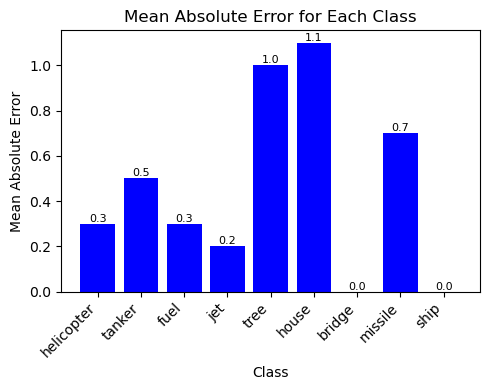

Average Mean MAE: 0.46


In [6]:
mae_per_class, average_mae = calculate_MAE(df_predicted, df_true)
plot_bar_chart(mae_per_class, False)
print("Average Mean MAE:", "{:.2f}".format(average_mae))

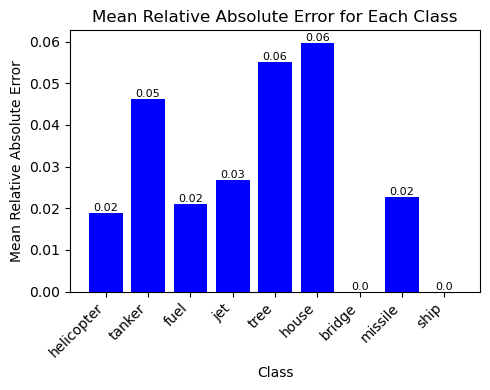

Average Mean Relative MAE: 0.03


In [7]:
rel_mae_per_class, rel_average_mae = calculate_relative_MAE(df_predicted, df_true)
plot_bar_chart(rel_mae_per_class, True)
print("Average Mean Relative MAE:", "{:.2f}".format(rel_average_mae))

## Object Destroyed by Missile Counting

In [8]:
df_predicted = pd.read_csv('which_destroyed.csv').drop(columns=['tree', 'house', 'missile', 'ship'])
df_true = pd.read_csv('which_destroyed_true.csv').drop(columns=['tree', 'house', 'missile', 'ship'])

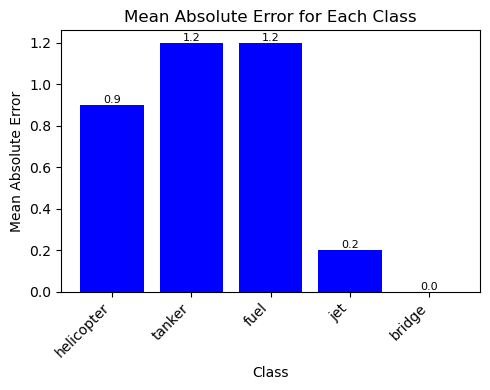

Average Mean MAE: 0.70


In [9]:
mae_per_class, average_mae = calculate_MAE(df_predicted, df_true)
plot_bar_chart(mae_per_class, False)
print("Average Mean MAE:", "{:.2f}".format(average_mae))

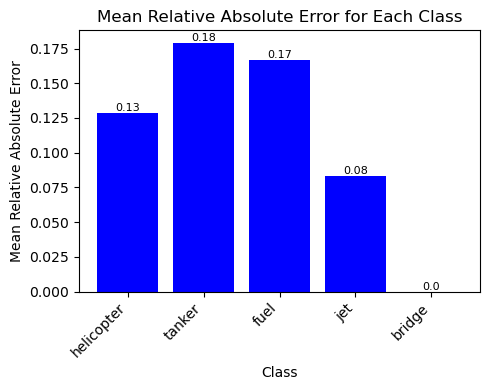

Average Mean Relative MAE: 0.11


In [10]:
rel_mae_per_class, rel_average_mae = calculate_relative_MAE(df_predicted, df_true)
plot_bar_chart(rel_mae_per_class, True)
print("Average Mean Relative MAE:", "{:.2f}".format(rel_average_mae))

## Evaluation Metric for Intervals and Instants
$\text{Intersection} = \begin{cases}\min(t_f, \hat{t}_f) - \max(t_i, \hat{t}_i), & \text{if } \min(t_f, \hat{t}_f) > \max(t_i, \hat{t}_i) \\
0, & \text{otherwise}
\end{cases}
$

$\text{Union} = (t_f - t_i) + (\hat{t}_f - \hat{t}_i) - \text{Intersection}$

### $\text{IoU} = \frac{\text{Intersection}}{\text{Union}}$






In [11]:
def calculate_iou(interval_pred, interval_true):
    intersection_start = max(interval_pred["move_start"], interval_true["move_start"])
    intersection_end = min(interval_pred["move_end"], interval_true["move_end"])
    
    if intersection_end <= intersection_start:
        return 0.0
    
    intersection = intersection_end - intersection_start
    union = (interval_pred["move_end"] - interval_pred["move_start"]) + (interval_true["move_end"] - interval_true["move_start"]) - intersection
    
    return intersection / union

def calculate_mean_iou(df_predicted, df_true): 
    # Calculate IoU for each pair of intervals
    ious = []
    for i in range(len(df_predicted)):
        interval_pred = df_predicted.loc[i]
        interval_true = df_true.loc[i]
        iou = calculate_iou(interval_pred, interval_true)
        ious.append(iou)
    
    # Compute mean IoU
    mean_iou = sum(ious) / len(ious)
    
    return mean_iou

### $\text{MAE} = \frac{1}{N} \sum_{i=1}^{N} |\hat{t} - t|$

In [12]:
def calculate_MAE(df_predicted, df_true):
    absolute_difference = np.abs(df_predicted.squeeze() - df_true.squeeze())
    mae = absolute_difference.mean()

    return mae

## Second Fuel Events Evaluation

In [13]:
df_predicted = pd.read_csv('when_second_fuel.csv')
df_true = pd.read_csv('when_second_fuel_true.csv')

In [14]:
mean_iou = calculate_mean_iou(df_predicted, df_true)
print("Mean IOU:", "{:.2f}".format(mean_iou))

Mean IOU: 1.00


In [15]:
appeared_MAE = calculate_MAE(df_predicted['appeared'], df_true['appeared'])
print("Appeared Instant MAE:", "{:.2f}".format(appeared_MAE))

Appeared Instant MAE: 0.00


In [16]:
disappeared_MAE = calculate_MAE(df_predicted['disappeared'], df_true['disappeared'])
print("Disappeared Instant MAE:", "{:.2f}".format(disappeared_MAE))

Disappeared Instant MAE: 0.00
